In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#import the data and view
df = pd.read_csv('/Users/dgitahi/Documents/nano degree/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Does smoking increase the chances of getting stroke

In [12]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [13]:
df.groupby(by = 'smoking_status')['id'].count()

smoking_status
Unknown            1544
formerly smoked     885
never smoked       1892
smokes              789
Name: id, dtype: int64

#### Drop those with unknown

For the pourpose of this analysis we drop any patient who smoking status is unknown

In [14]:

index_names = df[df['smoking_status']=='Unknown'].index
df_smokers = df.drop(index_names)

In [15]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

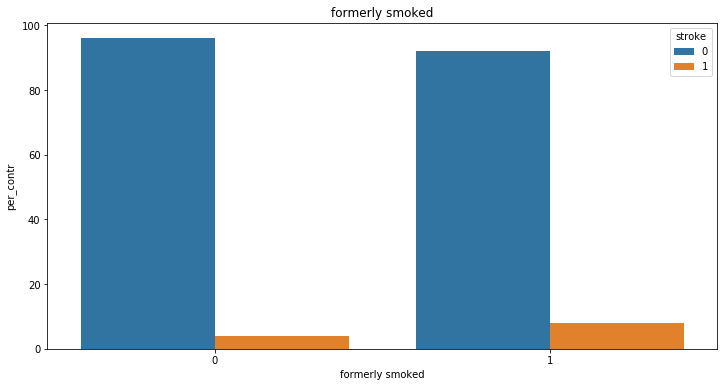

Patients who smoking status is formerly smoked,8.00% had stroke compared to 4.00% from the rest


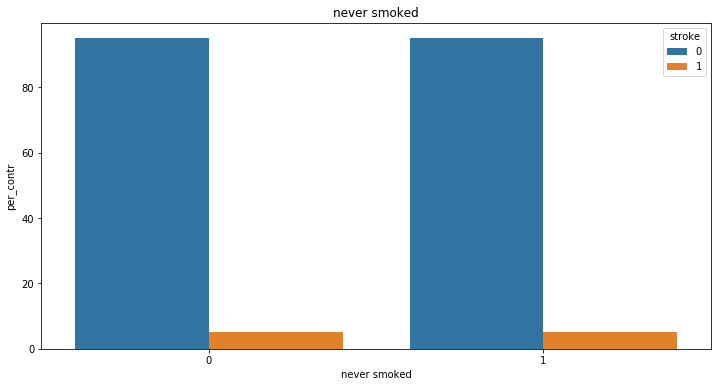

Patients who smoking status is never smoked,5.00% had stroke compared to 5.00% from the rest


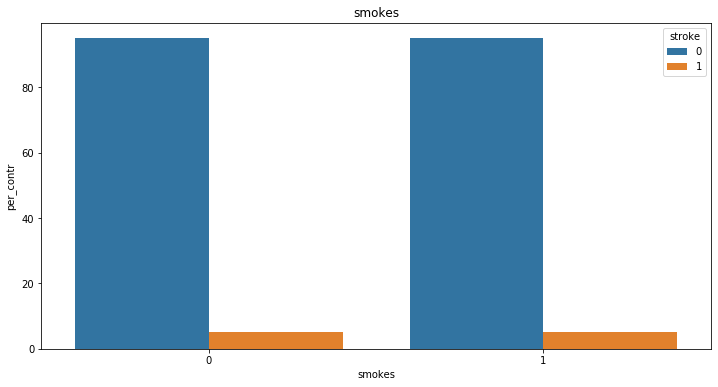

Patients who smoking status is smokes,5.00% had stroke compared to 5.00% from the rest


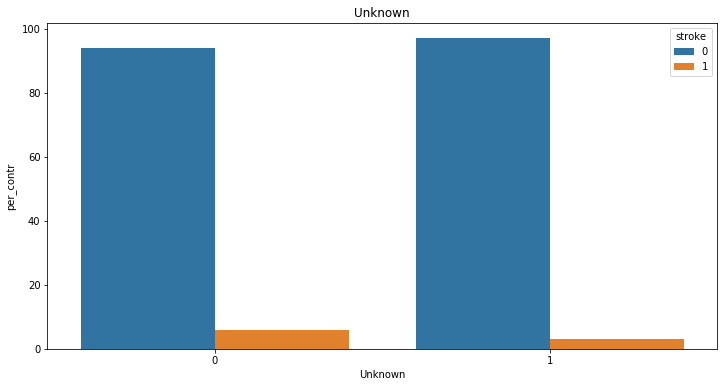

Patients who smoking status is Unknown,3.00% had stroke compared to 6.00% from the rest


In [16]:
#Comparing patients smoking status aand the percentage of the patient who have stroke
smoking_status =df.smoking_status.unique()




def smoking_effect(status):
    df_ = df[df['smoking_status']==status]
    summ = df_.groupby(by = 'stroke')['id'].count()
    stroke_per= round(summ[1]/len(df_)*100) # patients who have stroke and have the spesified status
    no_stroke_per = 100-stroke_per# patients who do not have stroke and have the spesified status



    df_ = df[~(df['smoking_status']==status)]
    #df_ = df[(df['smoking_status']=="never smoked")]
    summ = df_.groupby(by = 'stroke')['id'].count()
    _stroke_per = round(summ[1]/len(df_)*100) # patients who have stroke and dont have the specified status
    _no_stroke_per = 100-_stroke_per# patients who do not have stroke and dont have the specified status

    df_smoke = pd.DataFrame({'stroke':[1,1,0,0],status:[1,0,1,0],'per_contr':
                             [stroke_per,_stroke_per,no_stroke_per,_no_stroke_per]})
    
    
   

    #print(stroke_per)

    plt.figure(figsize=(12,6))
    plt.title(status)
    sns.barplot(x=status,y='per_contr',hue ='stroke',data=df_smoke)

    plt.show()
    
    print("Patients who smoking status is {1},{0:.2f}% had stroke compared to {2:.2f}% from the rest".format(stroke_per,status,_stroke_per))
    #print("Patients who did not  {1},{0:.2f}% had stroke".format(_stroke_per,status))
    
    #print(stroke_per)    
for status in smoking_status:
    smoking_effect(status)
#print("Only {0:.2f}% of the {1} produced worldwide is {2}!".format(0.5155675, "data", "analyzed"))
    
    
#Patients who smoking status is formerly smoked,8.00% had stroke compared to 4% from the rest of the patients

From the data above, we observe that patients who formerly smoked 8% had stroke compared to 5% who had never smoked.


Those who are currently smoking, the percentage of those with disease is similar to those who have never smoked

This may sugggest that smoking has a cause effect on stroke, though it may be after a long time